In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
server_list = [1, 2, 4]
MMN = []
for i in server_list:
    MMN.append(np.load('data/Q2/M_M_%s.npy' % i))

In [3]:
p = np.load('data/Q3/M_M_1_priority.npy')

In [4]:
MDN = []
MHN = []
for i in server_list:
    MDN.append(np.load('data/Q4/M_D_%s.npy' % i))
    MHN.append(np.load('data/Q4/M_h_%s.npy' % i))

In [19]:
n_servers = ['1 with SJF', 1, 2, 4]

In [7]:
p.shape

(100, 4, 50000)

In [5]:
MMN.insert(0, p)
len(MMN)

4

In [6]:
MMN[0].shape

(100, 4, 50000)

In [7]:
MHN[0].mean(axis=0)

array([0.00000000e+00, 1.02551888e+00, 1.75441778e+00, ...,
       4.44071894e+04, 4.44079446e+04, 4.44085462e+04])

In [135]:
MHN[0][:, :2000].shape

(100, 2000)

In [80]:
from statsmodels.stats.weightstats import ztest

mean = 84

ztest(MMN[1][:, 3].mean(axis=1), value=mean)

(-0.007513051698336578, 0.9940055084395608)

### Plots

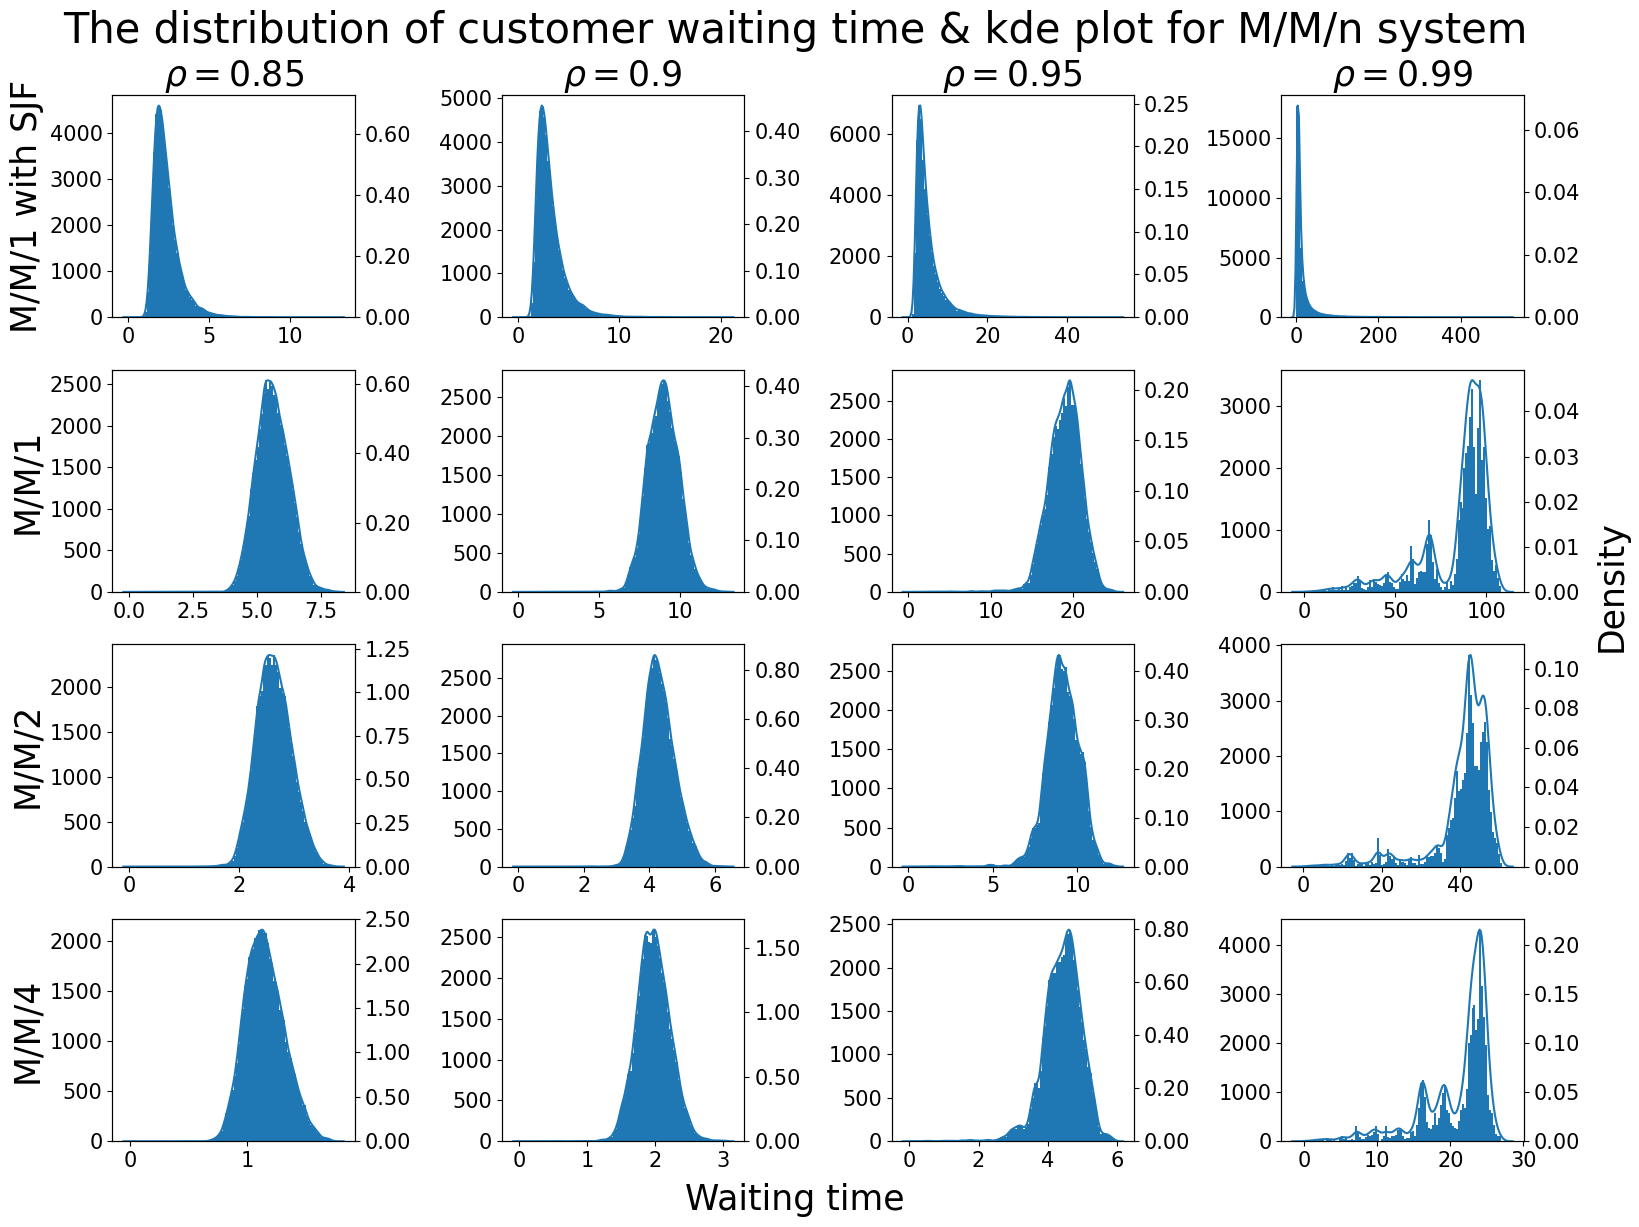

In [17]:
from matplotlib.ticker import FormatStrFormatter

plt.rcParams['figure.figsize'] = (16, 12)
fig1, ax = plt.subplots(4, 4)

RHO_list = [0.85, 0.9, 0.95, 0.99]

for i in range(4):
    for j in range(4):
        # Plot histogram
        hist = ax[i][j].hist(x=MMN[i][:, j, :].mean(axis=0), bins=100)
        ax[i][j].get_yaxis().set_visible(True)
        # Plot kde_plot
        ax2 = ax[i][j].twinx()
        ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        kde = sns.kdeplot(MMN[i][:, j, :].mean(axis=0), ax=ax2)
        kde.set(ylabel=None)

        # Adjust labels and ticks
        if j == 0:
            ax[i][j].set_ylabel(f'M/M/{n_servers[i]}', fontsize=25)
            ax[i][j].get_yaxis().set_visible(True)
        
        if i == 0:
            ax[i][j].set_title(fr'$\rho=${RHO_list[j]}', fontsize=25)

        ax2.tick_params(axis='y', which='major', labelsize=15)
        ax2.locator_params(axis='both', nbins=6)
        ax[i][j].tick_params(axis='both', which='major', labelsize=15)
        ax[i][j].locator_params(axis='y', nbins=6)
        ax[i][j].locator_params(axis='x', nbins=4)


fig1.text(0.5, -0.02, 'Waiting time', ha='center', fontsize=25)
fig1.text(1, 0.5, 'Density', va='center', rotation='vertical', fontsize=25)
fig1.suptitle('The distribution of customer waiting time & kde plot for M/M/n system', fontsize=30)

plt.tight_layout()
plt.show()

In [36]:
fig1.savefig('Plots/hist_kde.pdf', bbox_inches='tight')

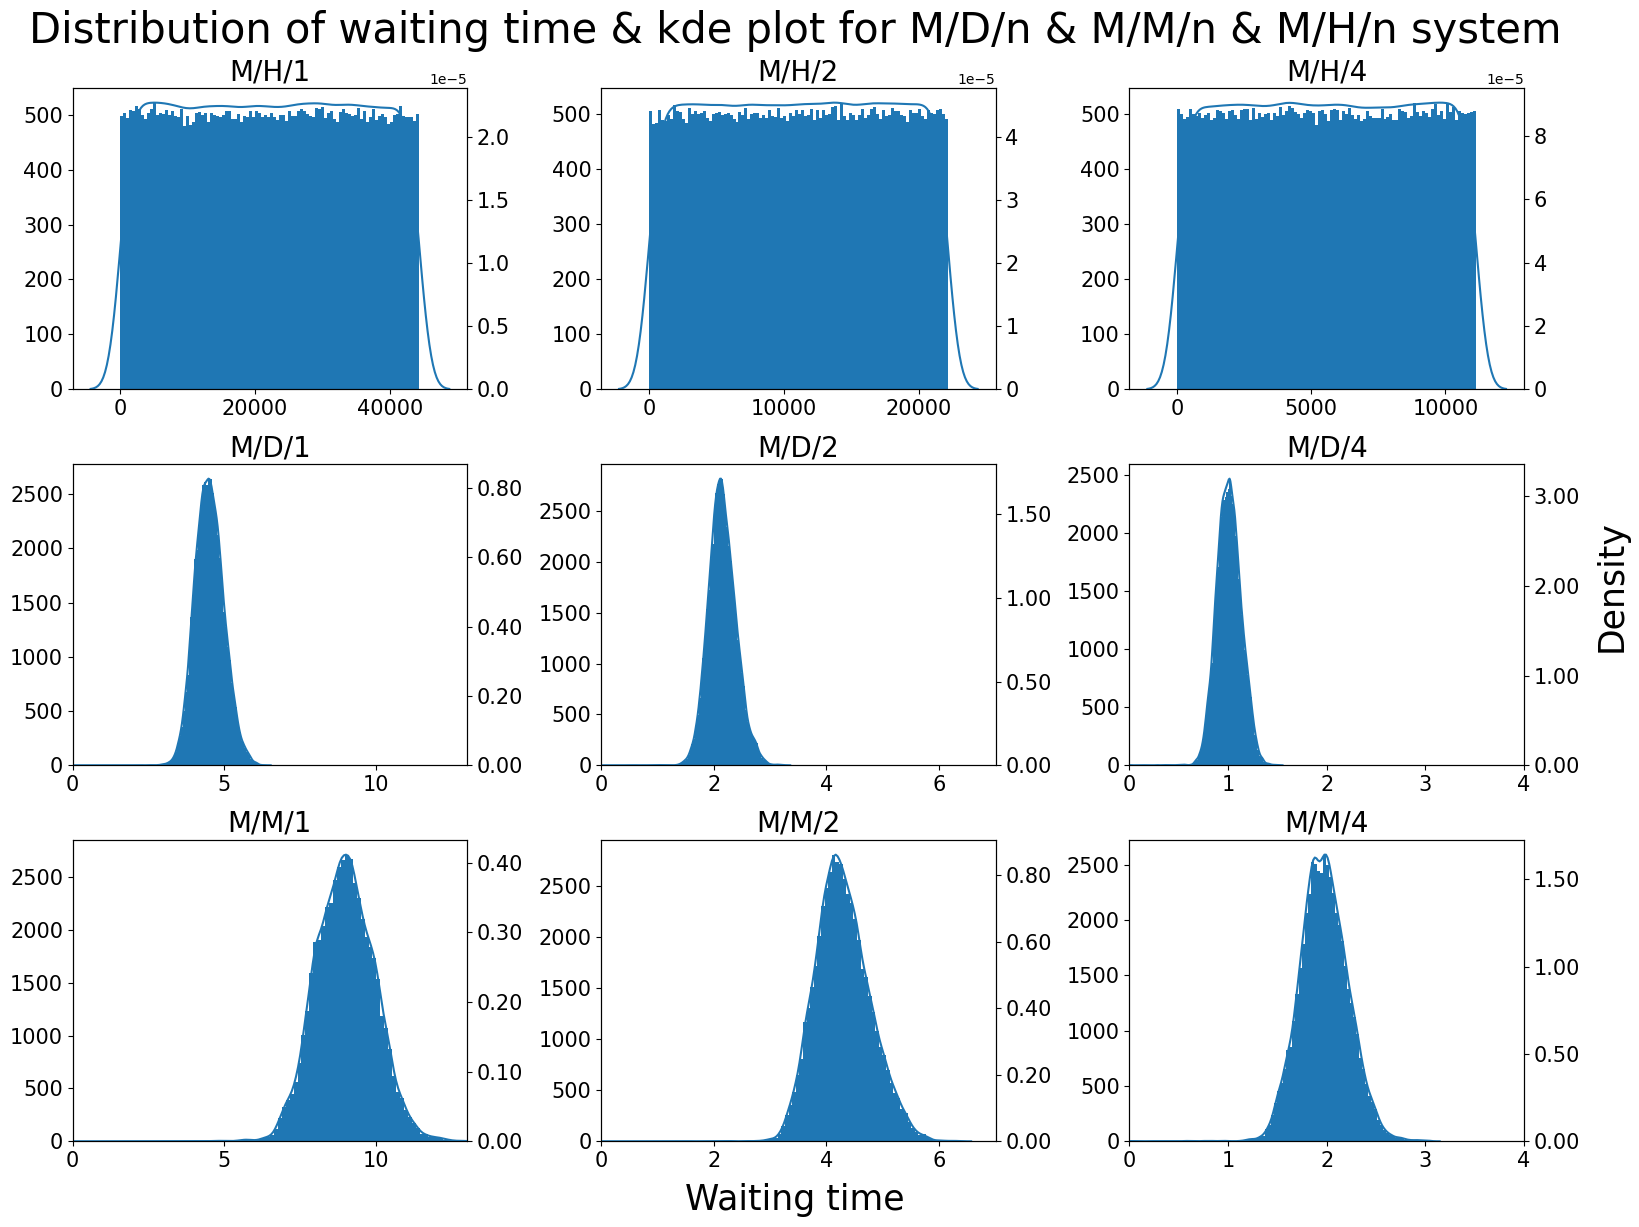

In [22]:
from matplotlib.ticker import FormatStrFormatter

plt.rcParams['figure.figsize'] = (16, 12)
fig2, ax = plt.subplots(3, 3)
# ax2 = ax.twinx()

# sns.kdeplot(test, ax=ax2)
RHO_list = [0.85, 0.9, 0.95, 0.99]

for i in range(3):
    # M/D/n
    # Plot histogram
    hist_MDN = ax[1][i].hist(x=MDN[i].mean(axis=0), bins=100)
    ax[1][i].get_yaxis().set_visible(True)
    # Plot kde_plot
    ax2 = ax[1][i].twinx()
    ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    kde_MDN = sns.kdeplot(MDN[i].mean(axis=0), ax=ax2)
    kde_MDN.set(ylabel=None)

    ax2.tick_params(axis='y', which='major', labelsize=15)
    ax2.locator_params(axis='both', nbins=6)

    # M/M/n
    # Plot histogram
    hist_MMN = ax[2][i].hist(x=MMN[i+1][:, 1].mean(axis=0), bins=100)
    ax[2][i].get_yaxis().set_visible(True)
    # Plot kde_plot
    ax3 = ax[2][i].twinx()
    ax3.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    kde_MMN = sns.kdeplot(MMN[i+1][:, 1].mean(axis=0), ax=ax3)
    kde_MMN.set(ylabel=None)
    ax3.tick_params(axis='y', which='major', labelsize=15)
    ax3.locator_params(axis='both', nbins=6)

    # M/H/n
    # Plot histogram
    hist_MHN = ax[0][i].hist(x=MHN[i].mean(axis=0), bins=100)
    ax[0][i].get_yaxis().set_visible(True)
    # Plot kde_plot
    ax4 = ax[0][i].twinx()
    # ax4.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    kde_MHN = sns.kdeplot(MHN[i].mean(axis=0), ax=ax4)
    kde_MHN.set(ylabel=None)

    ax4.tick_params(axis='y', which='major', labelsize=15)
    ax4.locator_params(axis='both', nbins=6)

    ax[1][i].tick_params(axis='both', which='major', labelsize=15)
    ax[1][i].locator_params(axis='y', nbins=6)
    ax[1][i].locator_params(axis='x', nbins=4)
    ax[1][i].set_title(f'M/D/{n_servers[i+1]}', fontsize=20)

    ax[2][i].tick_params(axis='both', which='major', labelsize=15)
    ax[2][i].locator_params(axis='y', nbins=6)
    ax[2][i].locator_params(axis='x', nbins=4)
    ax[2][i].set_title(f'M/M/{n_servers[i+1]}', fontsize=20)

    ax[0][i].tick_params(axis='both', which='major', labelsize=15)
    ax[0][i].locator_params(axis='y', nbins=6)
    ax[0][i].locator_params(axis='x', nbins=4)
    ax[0][i].set_title(f'M/H/{n_servers[i+1]}', fontsize=20)


    if i == 0:
        ax[1][i].set_xlim(0, 13)
        ax[2][i].set_xlim(0, 13)
    
    elif i == 1:
        ax[1][i].set_xlim(0, 7)
        ax[2][i].set_xlim(0, 7)

    else:
        ax[1][i].set_xlim(0, 4)
        ax[2][i].set_xlim(0, 4) 

fig2.text(0.5, -0.02, 'Waiting time', ha='center', fontsize=25)
fig2.text(1, 0.5, 'Density', va='center', rotation='vertical', fontsize=25)
fig2.suptitle('Distribution of waiting time & kde plot for M/D/n & M/M/n & M/H/n system', fontsize=30)

plt.tight_layout()
plt.show()

In [23]:
fig2.savefig('Plots/MDn_hist_kde.pdf', bbox_inches='tight')

In [24]:
df_MH1 = pd.DataFrame(columns=['Waiting time', 'Customer', 'model'])
df_MH2 = df_MH1.copy()
df_MH4 = df_MH1.copy()

for i in range(100):
    df1 = pd.DataFrame({'Waiting time': MHN[0][i, :5000],\
                        'Customer': np.arange(1, 5001),\
                        'model': ['M/H/1']*5000})
    df_MH1 = pd.concat([df_MH1, df1], ignore_index=True)

    df2 = pd.DataFrame({'Waiting time': MHN[1][i, :5000],\
                        'Customer': np.arange(1, 5001),\
                        'model': ['M/H/2']*5000})
    df_MH2 = pd.concat([df_MH2, df2], ignore_index=True)

    df4 = pd.DataFrame({'Waiting time': MHN[2][i, :5000],\
                        'Customer': np.arange(1, 5001),\
                        'model': ['M/H/4']*5000})
    df_MH4 = pd.concat([df_MH4, df4], ignore_index=True)

df_MHn = pd.concat([df_MH1, df_MH2, df_MH4], ignore_index=True)

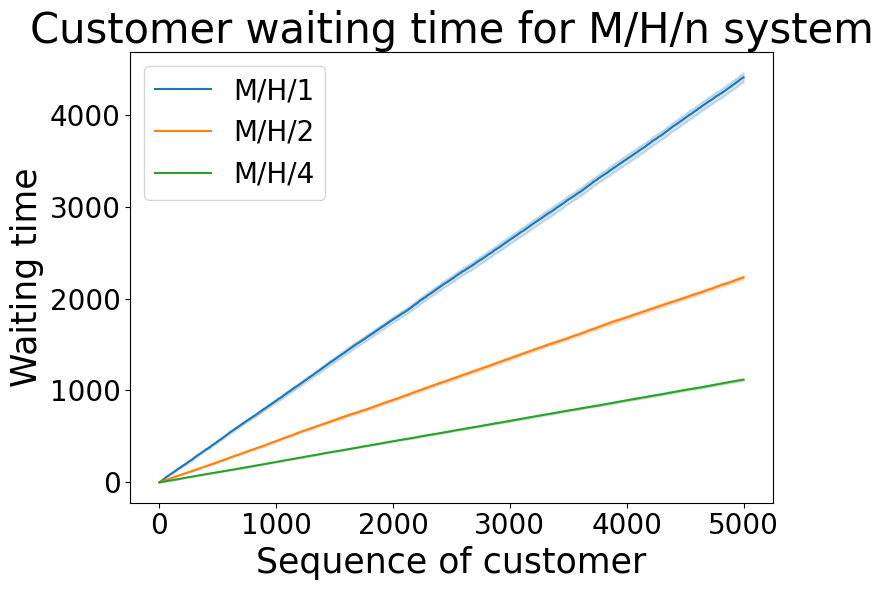

In [28]:
plt.rcParams['figure.figsize'] = (8, 6)

fig_mhn, ax_mhn = plt.subplots()

MHn_plot = sns.lineplot(data=df_MHn, x='Customer', y='Waiting time', hue='model', errorbar='ci', ax=ax_mhn)

ax_mhn.set_xlabel('Sequence of customer', fontsize=25)
ax_mhn.tick_params(axis='both', which='major', labelsize=20)
ax_mhn.set_ylabel('Waiting time', fontsize=25)
ax_mhn.set_title('Customer waiting time for M/H/n system', fontsize=30)
ax_mhn.legend(fontsize=20)

plt.tight_layout()
plt.show()

In [29]:
fig_mhn.savefig('Plots/MHN_line.pdf', bbox_inches='tight')

In [66]:
CUSTOMERS = 2000
repetition = 100
RHO_list = [0.85, 0.9, 0.95, 0.99]

In [67]:
df_MMN = pd.DataFrame(columns=['customer', 'W', 'n_servers', 'Rho', 'repetition'])

for i in range(3):
    for j in range(4):
        for z in range(repetition):
            df = pd.DataFrame({'customer': np.arange(1, CUSTOMERS+1),\
                                'W': MMN[i][z, j, :CUSTOMERS],\
                                'n_servers': [n_servers[i]] * CUSTOMERS,\
                                'Rho': [RHO_list[j]] * CUSTOMERS,\
                                'repetition': [z+1] * CUSTOMERS})
            df_MMN = pd.concat([df_MMN, df], ignore_index=True)

<AxesSubplot: xlabel='customer', ylabel='W'>

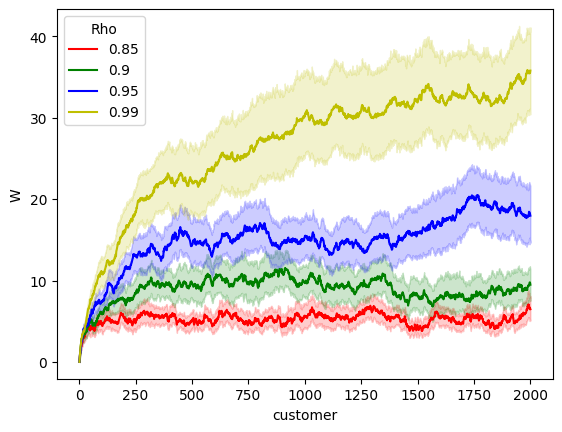

In [68]:
sns.lineplot(data=df_MMN[df_MMN.n_servers == 1], x='customer', y='W', hue='Rho', palette=['r', 'g', 'b', 'y'], errorbar='ci')

<AxesSubplot: xlabel='customer', ylabel='W'>

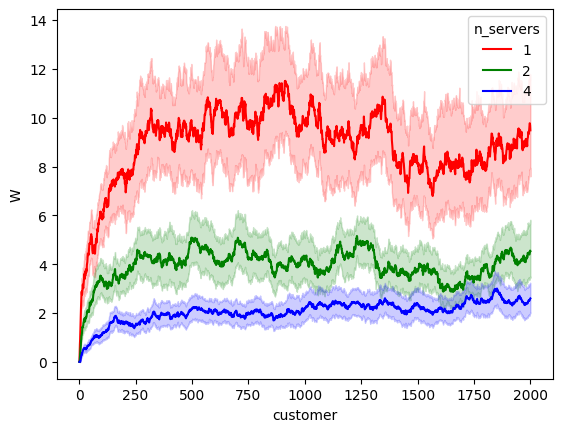

In [69]:
sns.lineplot(data=df_MMN[df_MMN.Rho == 0.9], x='customer', y='W', hue='n_servers', palette=['r', 'g', 'b'], errorbar='ci')

### Compute the theoretical results

In [87]:
import math

def xx(c, rho):
    coe = (c * rho) ** c / math.factorial(c)
    ssum = 0
    for i in range(c):
        ssum += (c*rho)**i / math.factorial(i)
    return coe / ((1-rho)*ssum + coe)

def waiting_time(c, rho, mu):
    return xx(c, rho) / (1-rho) / (c*mu)

In [94]:
xx(4, 0.9)

0.7877532642953624

In [98]:
waiting_time(4, 0.9, 1)

1.9693831607384065